In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.ndvi import get_yard_data, calculate_ndvi, process_image

import warnings
warnings.filterwarnings("ignore")
cmap = 'PiYG'

## Example of processing a single image

In [2]:
input_dir = '/mnt/data/bouwknegtl/aerialphotos'
# Add file location of the rgb/cir aerial images
input_aerial_rgb = input_dir + '/2023_RGB_breda1.tif'
input_aerial_cir = input_dir + '/2023_CIR_breda1.tif'

# load the images
aeriel_rgb = rasterio.open(input_aerial_rgb)
aeriel_cir = rasterio.open(input_aerial_cir)

# Obtain the bounds of the image 
bounds = tuple(aeriel_cir.bounds)

# Obtain the yard data given the image bounds
yard_data = get_yard_data(bounds)

# Process the aerial images according to the yard data
result_dataset = process_image(yard_data, aeriel_rgb, aeriel_cir)

Status: PENDING. Waiting...
Status: RUNNING. Waiting...
Download ready: /kadaster/kadastralekaart/download/v5_0/extract/d1f1cdc5-7a13-49ec-a965-b6f10d149b9a/extract.zip
Downloaded file saved to kadaaster_data.zip
Extracted files to kadaaster_data


In [3]:
# show the resulting dataset
result_dataset.head()

,erf_id,clipped_cir,clipped_rgb,affine_transform,area,ndvi,ndvi_mean
NL.IMKAD.KadastraalObject.5410269470000,f1519290-06ff-5f7c-9434-d182a470ffcf,"[[[--, --, --, --, --, --, --, --, --, --, --,...","[[[--, --, --, --, --, --, --, --, --, --, --,...","(0.25, 0.0, 111572.5, 0.0, -0.25, 402822.25, 0...",42668.5,"[[--, --, --, --, --, --, --, --, --, --, --, ...",-0.030213
NL.IMKAD.KadastraalObject.5410289870000,3b3e854f-5fcc-5b67-bfc5-31c42c896151,"[[[--, --, --, --, --, --, --, --, --, --, --,...","[[[--, --, --, --, --, --, --, --, --, --, --,...","(0.25, 0.0, 111518.75, 0.0, -0.25, 402246.75, ...",41295.0625,"[[--, --, --, --, --, --, --, --, --, --, --, ...",-0.185281
NL.IMKAD.KadastraalObject.5410289770000,d73d02c2-b970-54fb-87fd-ebffbdb87808,"[[[--, --, --, --, --, --, --, --, --, --, --,...","[[[--, --, --, --, --, --, --, --, --, --, --,...","(0.25, 0.0, 111607.5, 0.0, -0.25, 402257.25, 0...",41114.9375,"[[--, --, --, --, --, --, --, --, --, --, --, ...",-0.205740
NL.IMKAD.KadastraalObject.8390406670000,d5b5497e-0ab8-5de5-b101-8aee07bb1e08,"[[[--, --, --, --, --, --, --, --, --, --, --,...","[[[--, --, --, --, --, --, --, --, --, --, --,...","(0.25, 0.0, 116378.75, 0.0, -0.25, 405153.0, 0...",36556.875,"[[--, --, --, --, --, --, --, --, --, --, --, ...",0.211064
NL.IMKAD.KadastraalObject.5440077470000,75db9454-0c16-5a3c-b423-fb65f27691aa,"[[[--, --, --, --, --, --, --, --, --, --, --,...","[[[--, --, --, --, --, --, --, --, --, --, --,...","(0.25, 0.0, 111972.0, 0.0, -0.25, 400895.25, 0...",35978.5625,"[[--, --, --, --, --, --, --, --, --, --, --, ...",-0.120547


In [4]:
# remove clipped_cir, clipped_rgb, ndvi columns and save as csv
result_dataset.drop(['clipped_cir', 'clipped_rgb', 'ndvi'], axis=1).to_csv('data/2023_test_data.csv', index=False)

## Processing multiple images at once

In [6]:
bounds

(104499.25, 388704.0, 119257.5, 406242.5)

In [ ]:
### Load data and process the images 
years = [2016, 2023]
result_dataset = []
for count, year in enumerate(years):
    print('Loading ', year)
    # load the aerial images and get the geo bounds
    input_aerial_rgb = input_dir + f'/{year}_RGB_breda1.tif'
    input_aerial_cir = input_dir + f'/{year}_CIR_breda1.tif'
    aeriel_rgb = rasterio.open(input_aerial_rgb)
    aeriel_cir = rasterio.open(input_aerial_cir)
    if count > 0:
        assert aeriel_cir.bounds == bounds, "The bounds of the images are not the same over the years"
    bounds = tuple(aeriel_cir.bounds)
    if count == 0:
        yard_data = get_yard_data(bounds)
    result_dataset.append(process_image(yard_data, aeriel_rgb, aeriel_cir))
    print('Done')

Loading  2016
Status: PENDING. Waiting...
Status: RUNNING. Waiting...
Download ready: /kadaster/kadastralekaart/download/v5_0/extract/c30e023e-ee57-46e6-8057-98667d1043d6/extract.zip
Downloaded file saved to kadaaster_data.zip
Extracted files to kadaaster_data


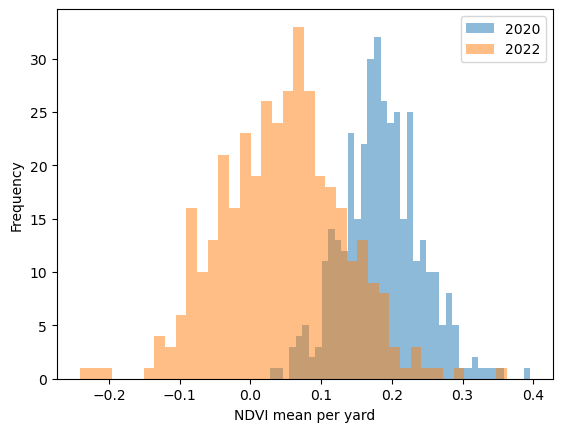

In [9]:
# make a ndvi histogram
for count, df in enumerate(result_dataset):
    plt.hist(df['ndvi_mean'], bins=40, alpha=0.5, label=years[count])
    plt.xlabel('NDVI mean per yard')
    plt.ylabel('Frequency')
plt.legend()

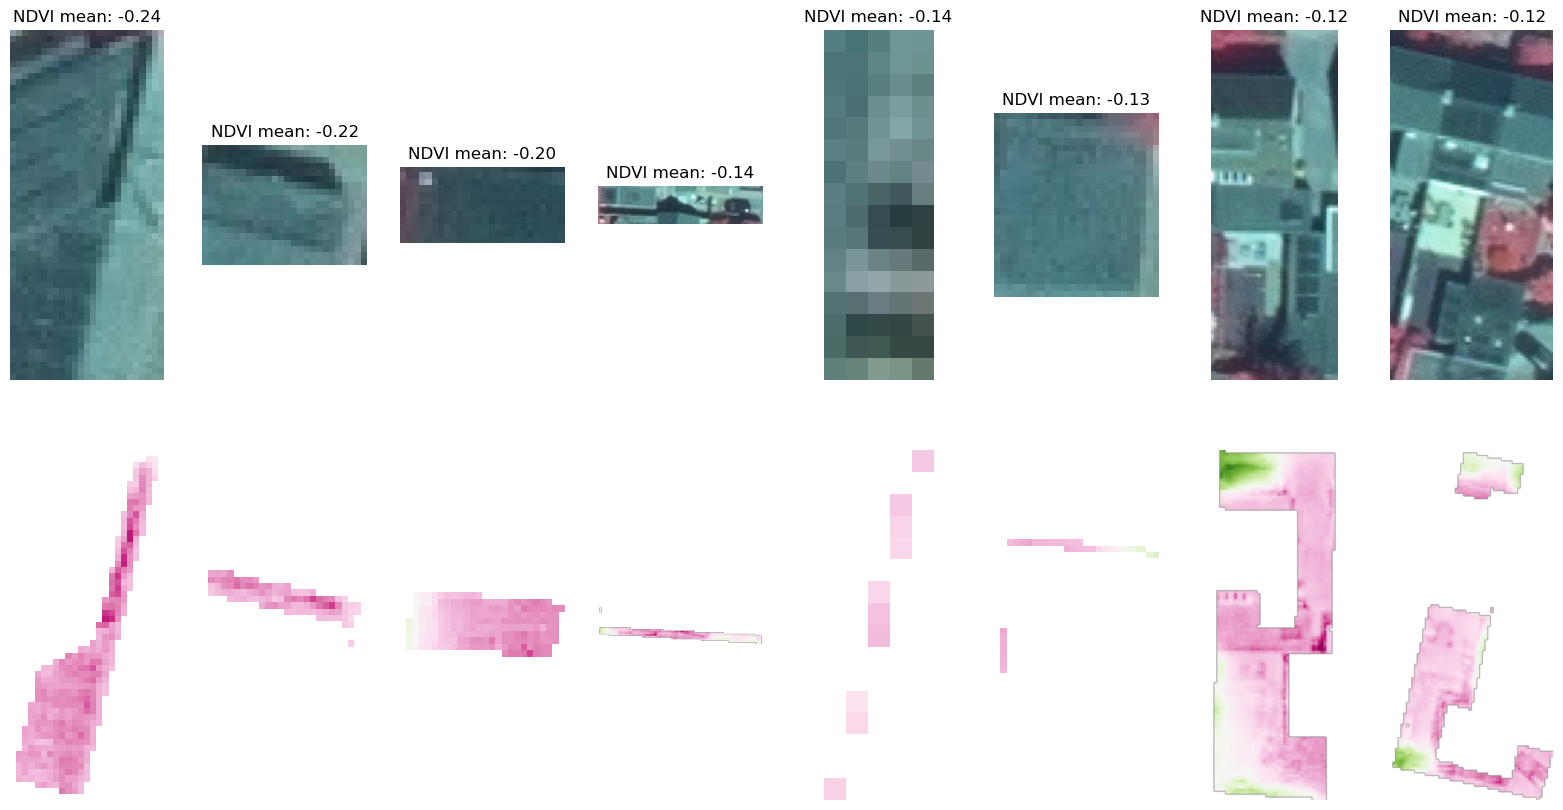

In [10]:
# plot top 8 plots with lowest NDVI mean and directly below that plot the correspondig NDVI map
top5 = df.sort_values(by='ndvi_mean').head(8)
fig, ax = plt.subplots(2, 8, figsize=(20, 10))
for i, (_, row) in enumerate(top5.iterrows()):
    ax[0, i].imshow(row['clipped_cir'].transpose((1, 2, 0)))
    ax[0, i].set_title(f"NDVI mean: {row['ndvi_mean']:.2f}")
    ax[0, i].axis('off')
    ax[1, i].imshow(row['ndvi'], cmap=cmap, vmin=-0.5, vmax=0.5)
    ax[1, i].axis('off')
plt.show()

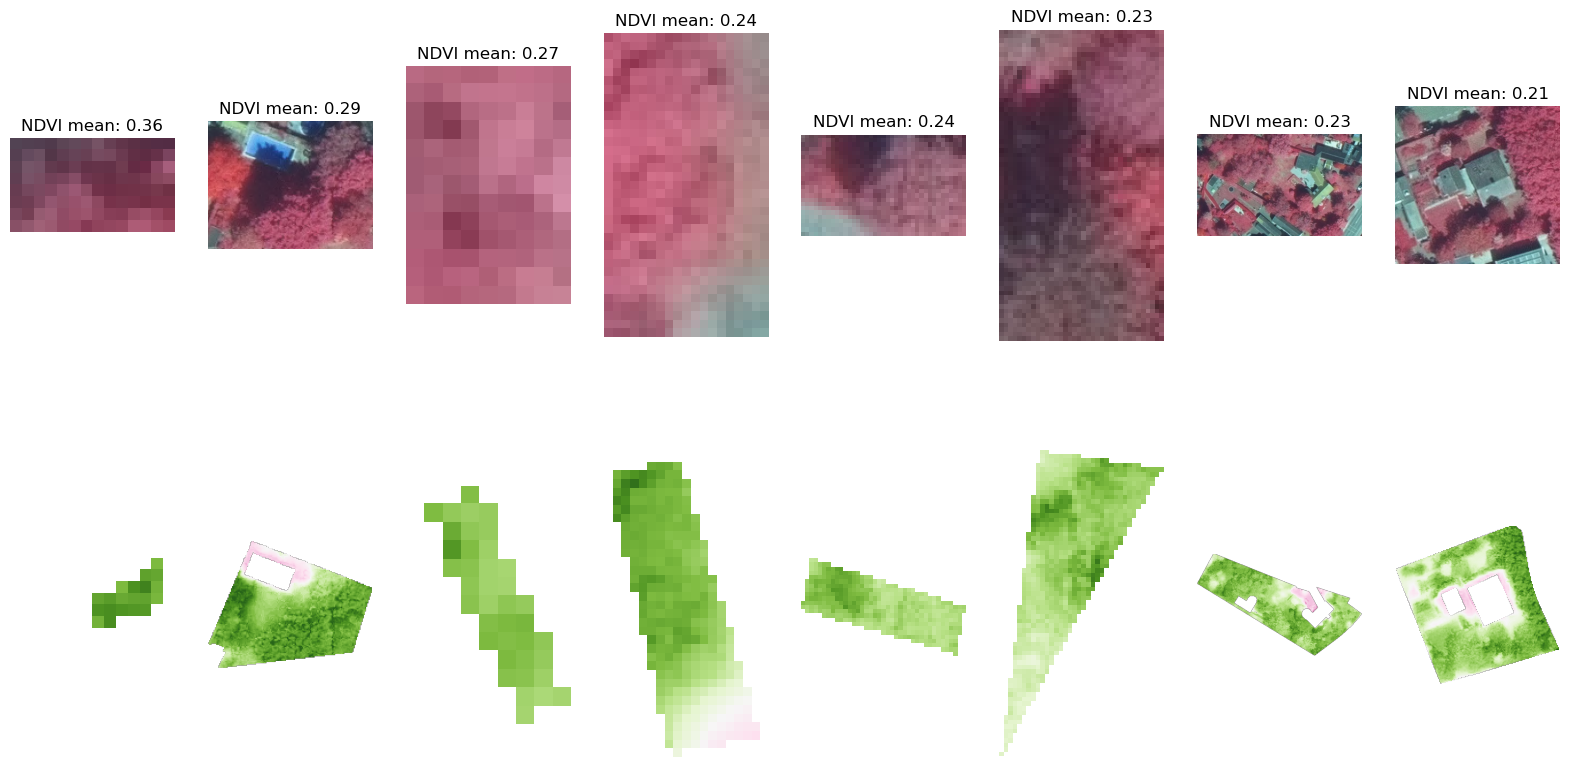

In [11]:
# plot top 5 plots with highest NDVI mean and directly below that plot the correspondig NDVI map
top5 = df.nlargest(8, 'ndvi_mean')
fig, ax = plt.subplots(2, 8, figsize=(20, 10))
for i, (_, row) in enumerate(top5.iterrows()):
    ax[0, i].imshow(row['clipped_cir'].transpose((1, 2, 0)))
    ax[0, i].set_title(f"NDVI mean: {row['ndvi_mean']:.2f}")
    ax[0, i].axis('off')
    ax[1, i].imshow(row['ndvi'], cmap=cmap, vmin=-0.5, vmax=0.5)
    ax[1, i].axis('off')
plt.show()

NL.IMKAD.KadastraalObject.6950406370000


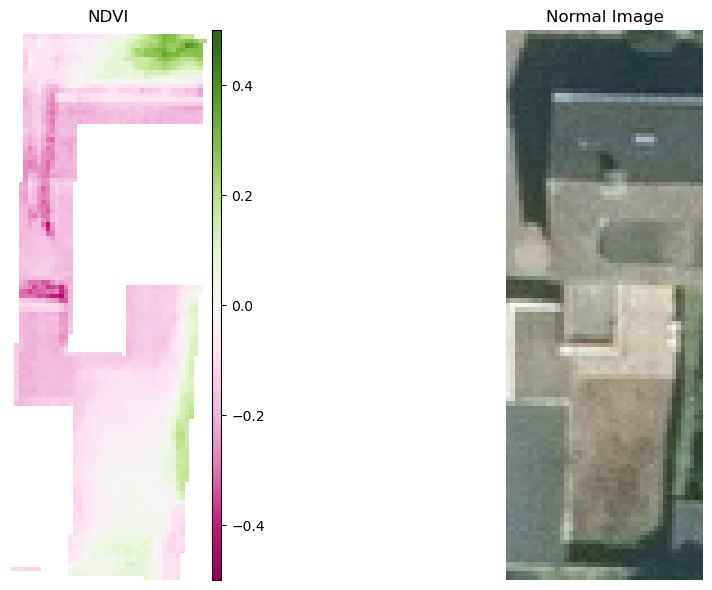

NL.IMKAD.KadastraalObject.6950364270000


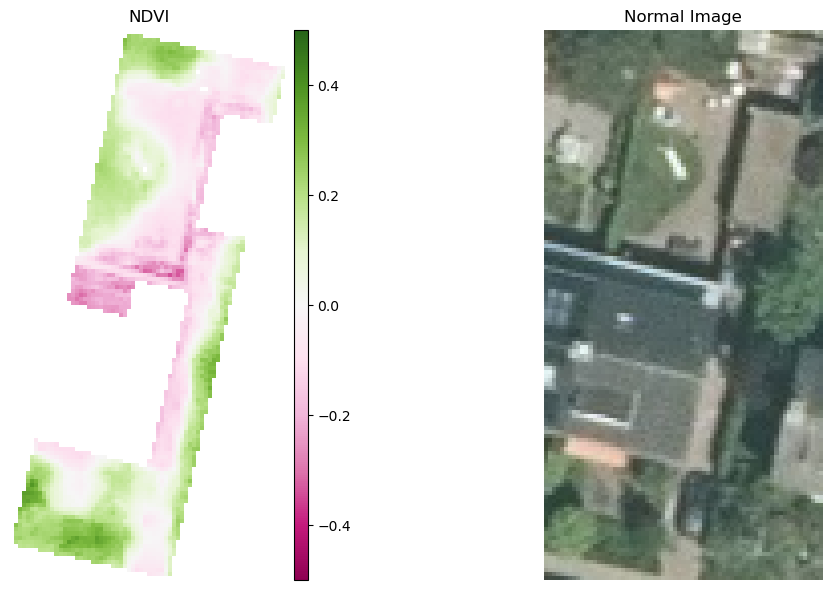

NL.IMKAD.KadastraalObject.6950379370000


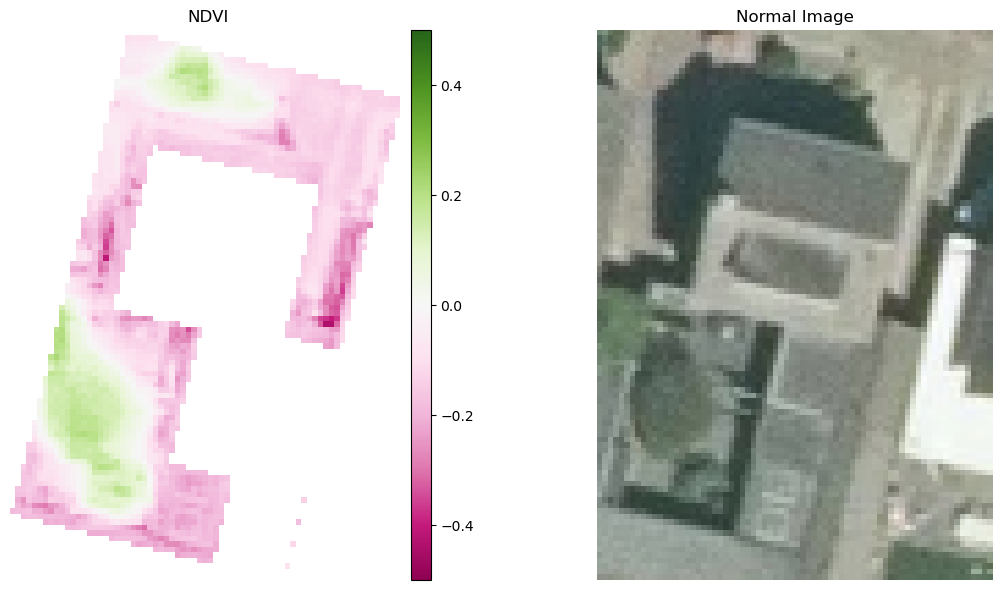

NL.IMKAD.KadastraalObject.6950566870000


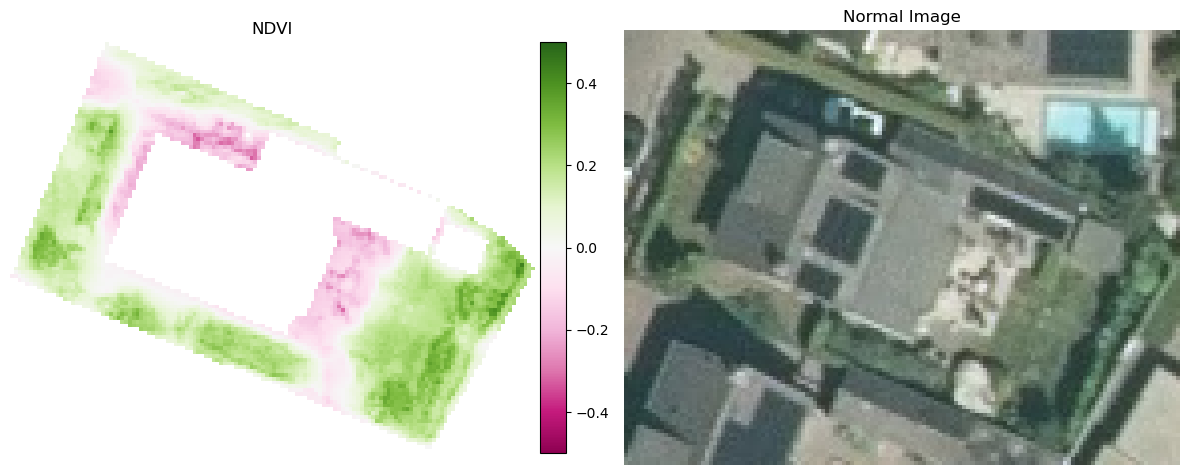

NL.IMKAD.KadastraalObject.6950636770000


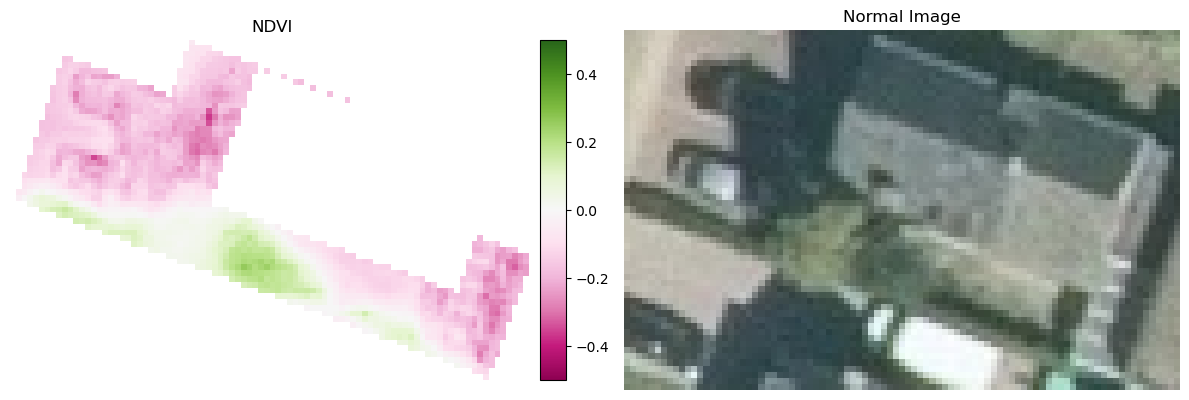

NL.IMKAD.KadastraalObject.6950429970000


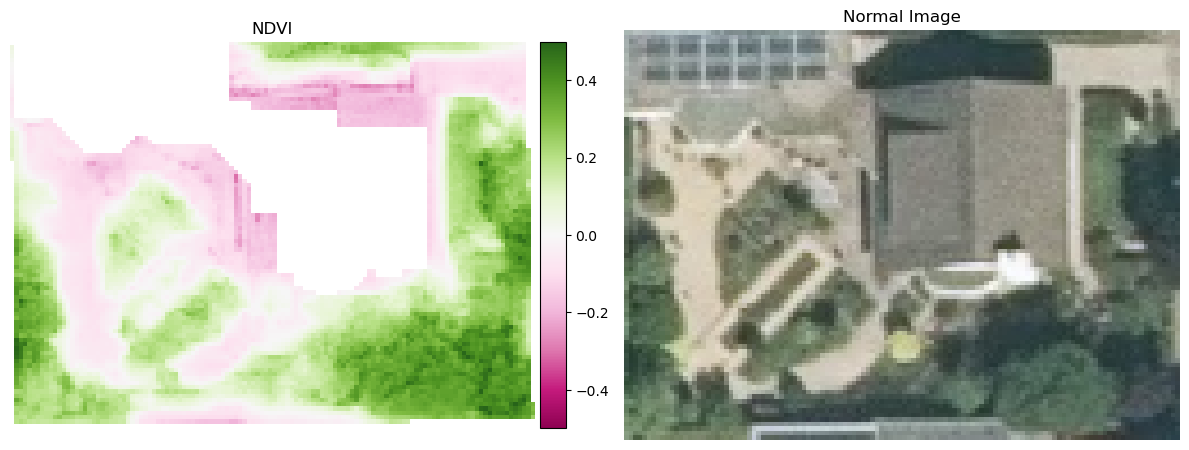

NL.IMKAD.KadastraalObject.6950422970000


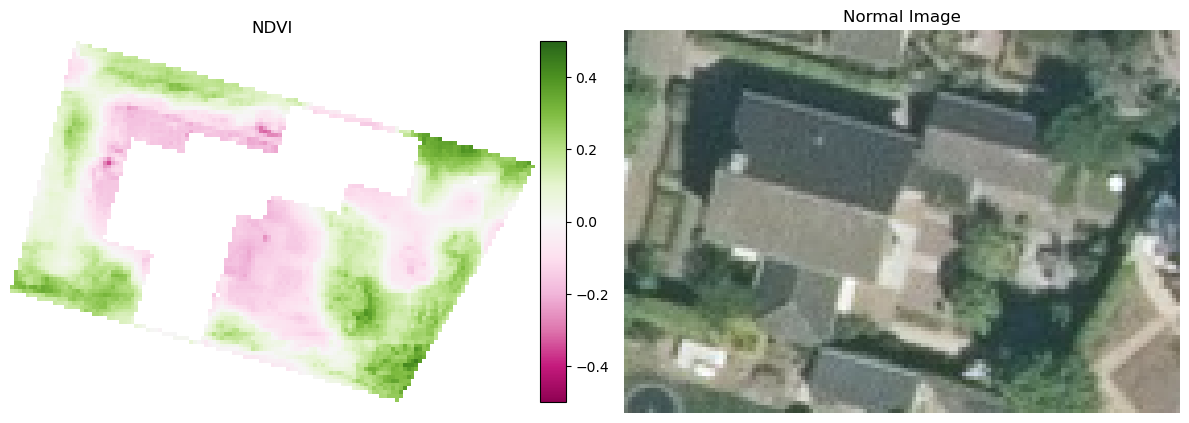

NL.IMKAD.KadastraalObject.6950545370000


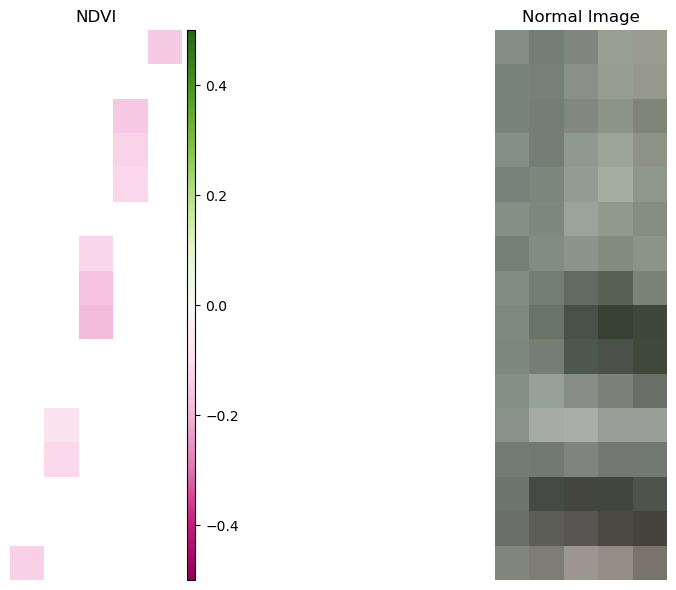

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# plot a couple of random erf's
for row in df.sample(8).iterrows():
    plot_name = row[0]
    zone_im = row[1].clipped_cir
    zone_im_rgb = row[1].clipped_rgb
    print(plot_name)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ndvi = calculate_ndvi(zone_im)

    divider = make_axes_locatable(axes[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    im1 = axes[0].imshow(ndvi, cmap=cmap, vmin=-0.5, vmax=0.5)
    axes[0].set_title('NDVI')
    axes[0].axis('off')
    fig.colorbar(im1, cax=cax, orientation='vertical')

    axes[1].imshow(np.transpose(zone_im_rgb[:3], axes=(1, 2, 0)))
    axes[1].set_title('Normal Image')
    axes[1].axis('off')

    axes[0].set_aspect('equal')
    axes[1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

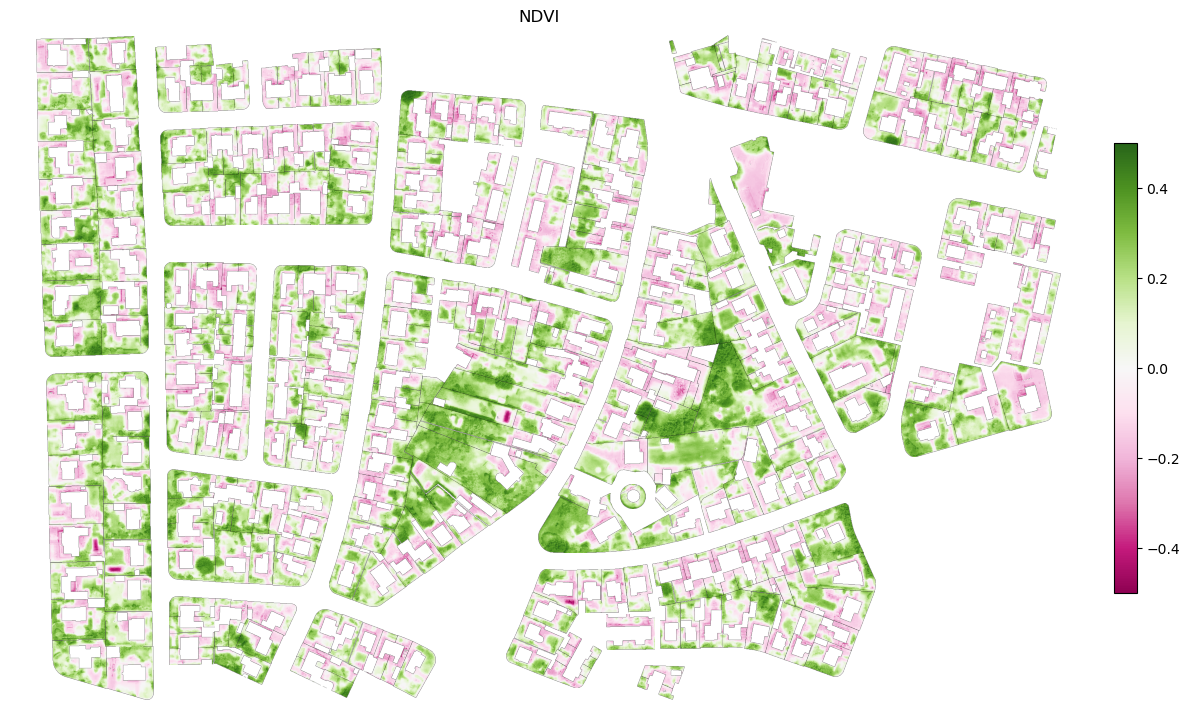

In [13]:
from rasterio.plot import show
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

norm = Normalize(vmin=-0.5, vmax=0.5)  # Set the same vmin and vmax as in the plot
fig, ax = plt.subplots(figsize=(12, 12))

for row in df.iterrows():
    plot_name = row[0]
    clipped_cir = row[1].clipped_cir
    clipped_rgb = row[1].clipped_rgb
    transform = row[1].affine_transform
    ndvi = row[1].ndvi
    divider = make_axes_locatable(axes[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Plot the CIR raster
    show(
        ndvi,
        transform=transform,
        ax=ax,
        title="Combined Plot of Clipped Zones",
        cmap=cmap,  # Use a color map
        vmin=-0.5,
        vmax=0.5,
    )

# Set labels and titles
plt.xlabel("Longitude")
sm = ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
plt.xlim(bounds[0], bounds[2])
plt.ylim(bounds[1], bounds[3])
plt.ylabel("Latitude")
plt.title("NDVI")
plt.axis("off")
plt.tight_layout()
plt.show()

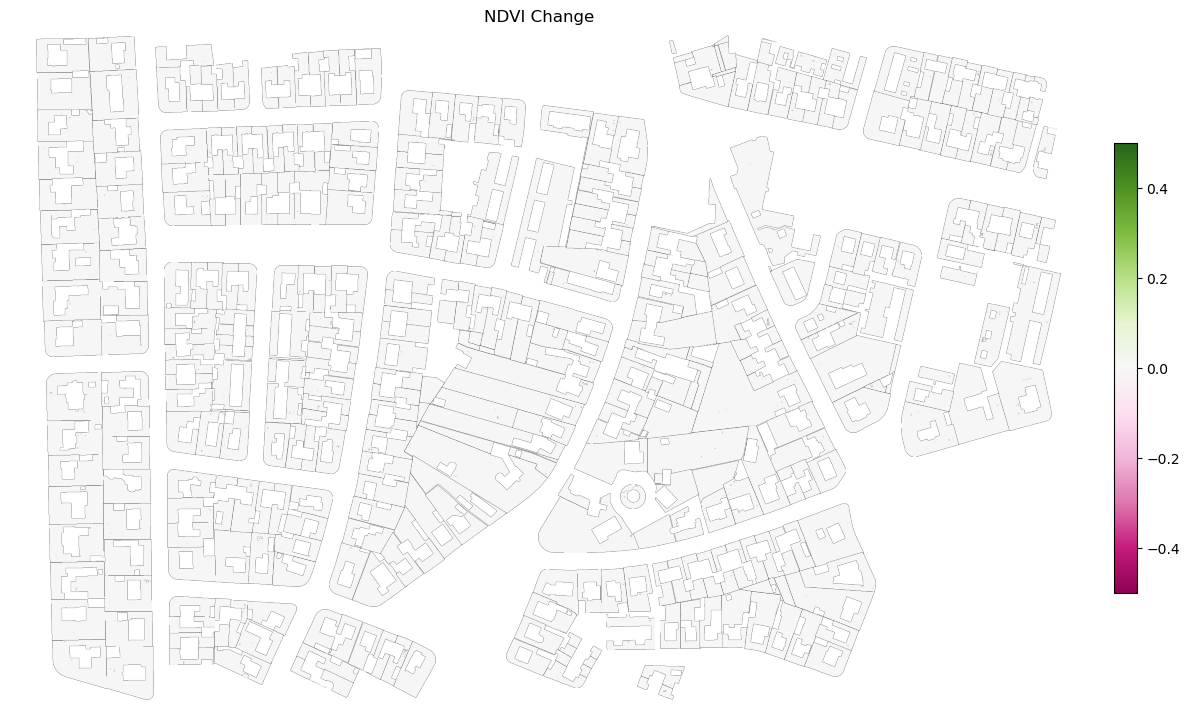

In [14]:
# plot difference

fig, ax = plt.subplots(figsize=(12, 12))

df1 = result_dataset[1]
df2 = result_dataset[-1]

for row in df1.iterrows():
    plot_name = row[0]
    clipped_cir = row[1].clipped_cir
    clipped_rgb = row[1].clipped_rgb
    transform = row[1].affine_transform
    ndvi1 = row[1].ndvi
    ndvi2 = df2.loc[plot_name]['ndvi']
    ndvi = ndvi2 - ndvi1
    divider = make_axes_locatable(axes[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Plot the CIR raster
    show(
        ndvi,
        transform=transform,
        ax=ax,
        title="Combined Plot of Clipped Zones",
        cmap=cmap,  # Use a color map
        vmin=-0.5,
        vmax=0.5,
    )

# Set labels and titles
plt.xlabel("Longitude")
sm = ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
plt.xlim(bounds[0], bounds[2])
plt.ylim(bounds[1], bounds[3])
plt.ylabel("Latitude")
plt.title("NDVI Change")
plt.axis("off")
plt.tight_layout()
plt.show()

In [15]:
# result_dataset is a list of dataframes from different years
# I'd like to merge them into one dataframe with a year column
# and also drop the clipped_cir, clipped_rgb, ndvi columns

df = pd.concat(result_dataset, keys=years, names=['year'])
df = df.reset_index()
df = df.drop(['clipped_cir', 'clipped_rgb', 'ndvi'], axis=1)
df.to_csv('data/combined_data.csv', index=False)